In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

New desired features:
Number of incidents that day, 

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
df = pd.read_csv('../src/merged_df_with_station_distance.csv')

In [84]:
df = df[df['year'] == 2023]

In [85]:
df.head()

,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,on_scene_time,valid_incident_response,incident_response_sec,travel_time_sec,to_hospital_time,hospital_arrival_time,close_time,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,year,month,day,week_day,hour,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,is_weekend,is_rush_hour,time_of_day,season,is_holiday,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
2,230010003,2023-01-01 00:00:30,DIFFFC,2,DIFFFC,2,2023-01-01T00:02:24.000,Y,114,2023-01-01T00:02:33.000,2023-01-01T00:08:29.000,Y,479.0,365.0,2023-01-01T00:27:50.000,2023-01-01T00:37:31.000,2023-01-01T01:27:09.000,N,82,BRONX,B5,10463,52,14,207,10,13,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0,40.8799,-73.9067,Engine 81/Ladder 46,0.361507
3,230010004,2023-01-01 00:01:35,INJURY,5,INJURY,5,2023-01-01T01:03:40.000,Y,3725,2023-01-01T01:03:40.000,2023-01-01T01:03:40.000,Y,3725.0,0.0,2023-01-01T01:17:52.000,2023-01-01T01:33:05.000,2023-01-01T02:13:23.000,N,82,MANHATTAN,M3,10018,14,3,104,2,10,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0,40.7553,-73.9933,Engine 34/Ladder 21,0.254109
7,230010011,2023-01-01 00:03:22,UNC,2,UNC,2,2023-01-01T00:08:20.000,Y,298,2023-01-01T00:08:32.000,2023-01-01T00:21:37.000,Y,1095.0,797.0,2023-01-01T00:41:37.000,2023-01-01T00:47:46.000,2023-01-01T01:39:16.000,N,82,MANHATTAN,M1,10002,7,1,103,1,12,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0,40.7156,-73.9862,Battalion 4/Engine 15/Ladder 18,0.176087
10,230010014,2023-01-01 00:04:23,SICK,6,SICK,6,2023-01-01T00:04:33.000,Y,10,2023-01-01T00:04:42.000,2023-01-01T00:10:32.000,Y,369.0,359.0,2023-01-01T00:19:10.000,2023-01-01T00:30:30.000,2023-01-01T01:15:35.000,N,82,BROOKLYN,K1,11224,60,47,313,21,8,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0,40.5771,-73.9881,Engine 318/Ladder 166,0.300912
12,230010016,2023-01-01 00:05:47,TRAUMA,2,MCI32,2,2023-01-01T00:07:04.000,Y,77,2023-01-01T00:07:38.000,2023-01-01T00:14:39.000,Y,532.0,455.0,2023-01-01T00:35:15.000,2023-01-01T00:41:44.000,2023-01-01T02:26:44.000,N,82,BROOKLYN,K4,11239,75,42,356,19,8,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0,40.6473,-73.8789,Battalion 58/Engine 257/Ladder 170,1.330329


In [86]:
df.info()

<class 'pandas.DataFrame'>
Index: 37074 entries, 2 to 59999
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   incident_id                      37074 non-null  int64  
 1   datetime                         37074 non-null  str    
 2   initial_type                     37074 non-null  str    
 3   initial_severity                 37074 non-null  int64  
 4   final_type                       37074 non-null  str    
 5   final_severity                   37074 non-null  int64  
 6   assignment_time                  37074 non-null  str    
 7   valid_dispatch_response          37074 non-null  str    
 8   dispatch_response_sec            37074 non-null  int64  
 9   activation_time                  37074 non-null  str    
 10  on_scene_time                    37074 non-null  str    
 11  valid_incident_response          37074 non-null  str    
 12  incident_response_sec            3

In [87]:
df.drop("incident_id", axis = 1).duplicated().sum()

np.int64(0)

In [88]:
df.dropna(inplace=True)

In [89]:
drop_list = ['incident_id', 'incident_response_sec', 'travel_time_sec', 'dispatch_response_sec', 
             'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 
             'activation_time', 'assignment_time', 'final_severity', 'final_type',
             # New drops for redundancy/low variance:
             'datetime', 'datetime_hour', 'datetime_weather', 'closest_station_name',
             'special_events', 'transferred', 'reopened', 'standby',  # Near-zero variance
             'precinct', 'council_district', 'community_district', 'school_district', 'congressional_district', # Redundant with borough,
             # changeable
             'zipcode', 'month', 'day', 'hour', 'temperture', 'precipitation', 'windspeed']

In [90]:
train_df, test_df = train_test_split(df)
X_train = train_df.drop(drop_list, axis = 1)
y_train = train_df['incident_response_sec']

In [91]:
X_train.shape

(27805, 19)

In [92]:
# Examine X_train columns and data types
print("X_train columns:")
print(X_train.columns.tolist())
print("\nData types:")
print(X_train.dtypes)
print("\nNumeric columns:")
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)
print("\nCategorical columns:")
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

X_train columns:
['initial_type', 'initial_severity', 'valid_dispatch_response', 'valid_incident_response', 'held', 'disposition', 'borough', 'dispatch_area', 'year', 'week_day', 'weathercode', 'is_weekend', 'is_rush_hour', 'time_of_day', 'season', 'is_holiday', 'latitude_of_call', 'longitude_of_call', 'closest_station_manhattan_miles']

Data types:
initial_type                           str
initial_severity                     int64
valid_dispatch_response                str
valid_incident_response                str
held                                   str
disposition                            str
borough                                str
dispatch_area                          str
year                                 int64
week_day                               str
weathercode                          int64
is_weekend                           int64
is_rush_hour                         int64
time_of_day                            str
season                                 str
is_

/tmp/ipykernel_24502/125768623.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()


In [93]:
# Check cardinality (unique values) and variance
print("=" * 70)
print("CARDINALITY ANALYSIS (number of unique values)")
print("=" * 70)
cardinality = X_train.nunique().sort_values(ascending=False)
print(cardinality)

print("\n" + "=" * 70)
print("VARIANCE AND VALUE DISTRIBUTION FOR LOW-FREQUENCY FEATURES")
print("=" * 70)
for col in ['reopened', 'special_events', 'standby', 'transferred', 'held', 
            'valid_dispatch_response', 'valid_incident_response']:
    if col in X_train.columns:
        print(f"\n{col}:")
        print(X_train[col].value_counts())
        print(f"  Dominant value percentage: {X_train[col].value_counts(normalize=True).iloc[0]*100:.1f}%")

CARDINALITY ANALYSIS (number of unique values)
closest_station_manhattan_miles    182
longitude_of_call                  178
latitude_of_call                   175
initial_type                       103
dispatch_area                       31
weathercode                         10
initial_severity                     8
week_day                             7
borough                              5
time_of_day                          4
disposition                          4
is_holiday                           2
is_weekend                           2
held                                 2
is_rush_hour                         2
valid_dispatch_response              1
valid_incident_response              1
year                                 1
season                               1
dtype: int64

VARIANCE AND VALUE DISTRIBUTION FOR LOW-FREQUENCY FEATURES

held:
held
N    25297
Y     2508
Name: count, dtype: int64
  Dominant value percentage: 91.0%

valid_dispatch_response:
valid_dispatch_res

In [94]:
X_train.isna().sum().sum()

np.int64(0)

In [95]:
X_train.describe()

,initial_severity,year,weathercode,is_weekend,is_rush_hour,is_holiday,latitude_of_call,longitude_of_call,closest_station_manhattan_miles
count,27805.000000,27805.0,27805.000000,27805.000000,27805.000000,27805.000000,27805.000000,27805.000000,27805.000000
mean,4.117785,2023.0,12.761230,0.249452,0.324762,0.075958,40.736128,-73.923726,0.484310
std,1.702914,0.0,20.962121,0.432703,0.468294,0.264935,0.086574,0.081361,0.277492
min,1.000000,2023.0,0.000000,0.000000,0.000000,0.000000,40.507000,-74.242600,0.076895
25%,3.000000,2023.0,2.000000,0.000000,0.000000,0.000000,40.670900,-73.973300,0.289868
50%,4.000000,2023.0,3.000000,0.000000,0.000000,0.000000,40.734100,-73.925100,0.423131
75%,6.000000,2023.0,3.000000,0.000000,1.000000,0.000000,40.818100,-73.878900,0.635447
max,8.000000,2023.0,71.000000,1.000000,1.000000,1.000000,40.898500,-73.711600,2.005654


In [96]:
y_train.describe()

count    27805.000000
mean       658.746377
std        685.535974
min          0.000000
25%        345.000000
50%        497.000000
75%        730.000000
max      17908.000000
Name: incident_response_sec, dtype: float64

## Feature Selection

In [97]:
X_train_dummies = pd.get_dummies(X_train, drop_first=True, sparse=True)
# This is your best quick fix

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
#instantiate a linear regression model
linreg_model = LinearRegression()

#fit the model to our training data
linreg_model.fit(X_train_dummies, y_train)

#make our first set of predictions (again on the training data)
train_preds = linreg_model.predict(X_train_dummies)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:888: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:888: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [100]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [101]:
print(f"Root mean squared error (RMSE): {root_mean_squared_error(y_true = y_train, y_pred=train_preds)}")
print(f"Mean absolute error (MAE): {mean_absolute_error(y_true = y_train, y_pred=train_preds)}")
print(f"R^2 score: {r2_score(y_true = y_train, y_pred=train_preds)}")

Root mean squared error (RMSE): 568.9699645139574
Mean absolute error (MAE): 300.2894134574344
R^2 score: 0.31113550316042304


Text(0, 0.5, 'Predicted values')

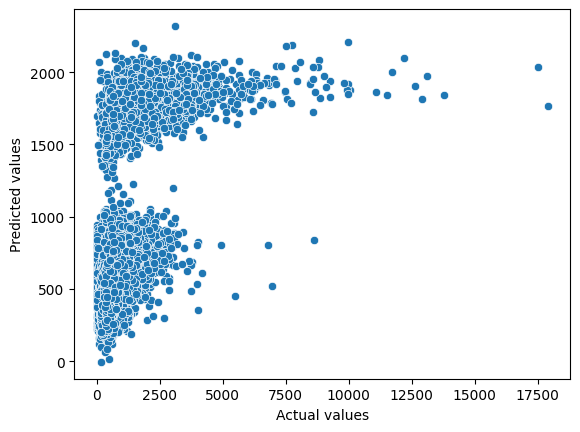

In [102]:
sns.scatterplot(x = y_train, y=train_preds)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")